In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from tqdm import tqdm
import os
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

# Filtro

In [6]:
add_noise = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.7),
])
pitch_shift = Compose([
    PitchShift(min_semitones=-4, max_semitones=12, p=0.5),
])

# Lectura de las señales de audio

In [3]:

#temporary list for the input data
audio_files = []

#list to append all the labels
labels_files = []

base_path = '/Users/aleja/Downloads/Data/genres_original'

#l = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
l = os.listdir(base_path)
l.pop(1)

#looping through all label directories
for label in tqdm(l): 
    file_path = base_path + '/' + label 
    
    #looping through each file in the directory
    for pth in os.listdir(file_path): 
        
        try:
            final_path = file_path + '/' + pth

            #loading original file
            audio, sr = librosa.load(final_path,duration = 28)
            
            #appending data to a list
            audio_files.append(audio)
          

            #appending labels to the label list
            labels_files.append(label)
            
        except:
            print("Error in file", pth)
            pass
        
#converting list to a numpy array
audio_files = np.stack(audio_files)

 90%|█████████ | 9/10 [00:03<00:00,  2.72it/s]/Users/aleja/miniconda3/envs/EXPIII/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Error in file jazz.00054.wav


100%|██████████| 10/10 [00:04<00:00,  2.49it/s]


# Dataset de entrenamiento y prueba

In [4]:
from sklearn.model_selection import train_test_split
#split the data using the SkLearn library
audio_train, audio_test, y_train, y_test = train_test_split(\
     audio_files, labels_files, test_size=0.20, random_state=9)

In [5]:
clases = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

blues = []
classical = []
country = []
disco = []
hiphop = []
jazz = []
metal = []
pop = []
reggae = []
rock = []


for gender in y_test:
    if gender == 'blues':
        blues.append(gender)
    elif gender == 'classical':
        classical.append(gender)
    elif gender == 'country':
        country.append(gender)
    elif gender == 'disco':
        disco.append(gender)
    elif gender == 'hiphop':
        hiphop.append(gender)
    elif gender == 'jazz':
        jazz.append(gender)
    elif gender == 'metal':
        metal.append(gender)
    elif gender == 'pop':
        pop.append(gender)
    elif gender == 'reggae':
        reggae.append(gender)
    else:
        rock.append(gender)



In [6]:
x = np.array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])
y = np.array([len(blues), len(classical), len(country), len(disco), len(hiphop), len(jazz), len(metal), len(pop), len(reggae), len(rock)])

r = pd.DataFrame()
r['GENDER'] = x
r['CANTIDAD DE CANCIONES'] = y
r

,GENDER,CANTIDAD DE CANCIONES
0,blues,22
1,classical,23
2,country,18
3,disco,18
4,hiphop,22
5,jazz,19
6,metal,15
7,pop,26
8,reggae,17
9,rock,20


# Espectogramas Mel

In [15]:
#setting melspec features
n_mels = 128
hop_length = 512
n_fft = 1024

def get_melspec(audio, sr = sr, n_fft = n_fft, hop_length = hop_length, n_mels = n_mels):
    #calculate the melspectogram of the provided audio wave
    S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    
    return S

In [16]:

#temporary list for the input data
X_train = []

#list to append all the labels
Y_train = []

#looping through train data to create melspec and augment data
for i, dat in tqdm(enumerate(audio_train)):
        
    try:

        #adding noise to the file
        noisy_audio = add_noise(dat ,sr)
        #changing pitch of the audio
        pitch_audio = pitch_shift(dat, sr)

        #generate melspec for original and augmented files
        mel = get_melspec(dat)
        noise_mel = get_melspec(noisy_audio)
        pitch_mel = get_melspec(pitch_audio)

        #appending augmented data to original training data
        X_train.append(mel)
        Y_train.append(y_train[i])
        X_train.append(noise_mel)
        Y_train.append(y_train[i])
        X_train.append(pitch_mel)
        Y_train.append(y_train[i])


    except Exception as e:
        print("Error in file:", pth)
        print("Error:", e)

0it [00:00, ?it/s]/var/folders/t9/5bw6c3lj49dftn5wk2j7hfd40000gn/T/ipykernel_1201/151441632.py:8: FutureWarning: Pass y=[-0.00979614 -0.00924683  0.00430298 ...  0.08947754  0.1020813
  0.10180664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
/var/folders/t9/5bw6c3lj49dftn5wk2j7hfd40000gn/T/ipykernel_1201/151441632.py:8: FutureWarning: Pass y=[ 0.00854776 -0.01609183 -0.00203232 ...  0.10136801  0.08153439
  0.06878148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
/var/folders/t9/5bw6c3lj49dftn5wk2j7hfd40000gn/T/ipykernel_1201/151441632.py:8: FutureWarning: Pass y=[-0.00858288 -0.00603698  0.02312126 ...  0.06118665  0.06684857
  0.        ] as keyword args. From version 0.10 passing

In [17]:
#temporary list for the input data
X_test = []

#list to append all the labels
Y_test = []

#looping through train data to create melspec and augment data
for i, dat in tqdm(enumerate(audio_test)):
        
    try:
        #generate melspec for original and augmented files
        mel = get_melspec(dat)
       
        #Appending test melspec to list
        X_test.append(mel)
        Y_test.append(y_test[i])
        

    except Exception as e:
        print("Error in file:", pth)
        print("Error:", e)

0it [00:00, ?it/s]/var/folders/t9/5bw6c3lj49dftn5wk2j7hfd40000gn/T/ipykernel_1201/151441632.py:8: FutureWarning: Pass y=[ 0.01235962 -0.01074219 -0.03161621 ...  0.01916504 -0.00027466
  0.0305481 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
/var/folders/t9/5bw6c3lj49dftn5wk2j7hfd40000gn/T/ipykernel_1201/151441632.py:8: FutureWarning: Pass y=[-0.04223633 -0.19863892 -0.24645996 ... -0.12487793  0.01150513
  0.08917236] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
/var/folders/t9/5bw6c3lj49dftn5wk2j7hfd40000gn/T/ipykernel_1201/151441632.py:8: FutureWarning: Pass y=[0.2953186  0.21789551 0.2272644  ... 0.41177368 0.475708   0.45510864] as keyword args. From version 0.10 passing these

In [18]:
#converting the test and train data to numpy array
X_train = np.stack(X_train)
X_test = np.stack(X_test)

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y_train)

Y_train = encoder.transform(Y_train).reshape([len(Y_train), 1])

encoder = LabelEncoder()
encoder.fit(Y_test)

Y_test = encoder.transform(Y_test).reshape([len(Y_test), 1])

In [20]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

# CNN

In [21]:
#importing the keras modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GRU
from keras.callbacks import Callback, EarlyStopping

#Initiating the model as Sequential
model = Sequential()

#Adding the CNN layers along with some drop outs and maxpooling
model.add(Conv2D(64, 2, activation = 'relu', input_shape = (X_train.shape[1:])))
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Dropout(0.1))
model.add(Conv2D(128, 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Dropout(0.1))
model.add(Conv2D(256, 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4,4)))
#model.add(Dropout(0.1))
model.add(Conv2D(512, 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4,4)))
#model.add(Dropout(0.1))

#flattening the data to be passed to a dense layer
model.add(Flatten())

#Adding the dense layers
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

#final output layer with 10 predictions to be made
model.add(Dense(10, activation = 'softmax'))

'''
Optimizer = Adam
Loss = Sparse Categorical CrossEntropy
'''
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 1205, 64)     320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 602, 64)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 601, 128)      32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 300, 128)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 299, 256)      131328    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 74, 256)       0

In [22]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10)

Epoch 1/10


2022-04-10 22:51:45.689455: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


75/75 [==============================] - 343s 5s/step - loss: 3.6114 - accuracy: 0.2078 - val_loss: 1.9243 - val_accuracy: 0.3250
Epoch 2/10
75/75 [==============================] - 362s 5s/step - loss: 1.7201 - accuracy: 0.3842 - val_loss: 1.8957 - val_accuracy: 0.3150
Epoch 3/10
75/75 [==============================] - 349s 5s/step - loss: 1.4107 - accuracy: 0.4994 - val_loss: 1.8596 - val_accuracy: 0.4650
Epoch 4/10
75/75 [==============================] - 324s 4s/step - loss: 0.9438 - accuracy: 0.6859 - val_loss: 2.1756 - val_accuracy: 0.4450
Epoch 5/10
75/75 [==============================] - 310s 4s/step - loss: 0.6406 - accuracy: 0.7964 - val_loss: 3.5577 - val_accuracy: 0.4500
Epoch 6/10
75/75 [==============================] - 321s 4s/step - loss: 0.3485 - accuracy: 0.8903 - val_loss: 4.3955 - val_accuracy: 0.5100
Epoch 7/10
75/75 [==============================] - 326s 4s/step - loss: 0.1372 - accuracy: 0.9562 - val_loss: 5.4864 - val_accuracy: 0.4850
Epoch 8/10
75/75 [======

# Evaluación

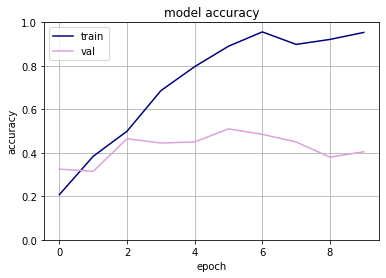

In [28]:
plt.plot(history.history['accuracy'], color='navy')
plt.plot(history.history['val_accuracy'], color='plum')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.ylim(0,1)

plt.show()

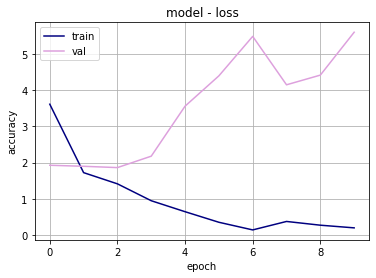

In [29]:
plt.plot(history.history['loss'], color='navy')
plt.plot(history.history['val_loss'], color='plum')
plt.title('model - loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [25]:
y_pred=model.predict(X_test)
y_pred.shape

(200, 10)

Confusion Matrix


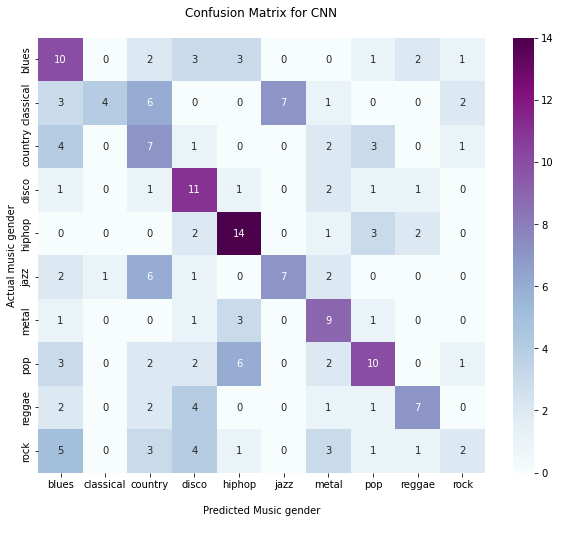

In [26]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix
import seaborn as sns

Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
cf_matrix=confusion_matrix(Y_test, Y_pred)

plt.figure(figsize = (10,8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='BuPu')

ax.set_title('Confusion Matrix for CNN\n');
ax.set_xlabel('\nPredicted Music gender\n')
ax.set_ylabel('Actual music gender');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])
ax.yaxis.set_ticklabels(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])

## Display the visualization of the Confusion Matrix.
plt.show()